In [1]:
pip install pydotplus

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix,classification_report
import pydotplus
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv(r"C:\Users\Abcom\Downloads\E_Commerce.csv")

In [11]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [13]:
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [17]:
df.shape

(10999, 12)

In [19]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [21]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [25]:
df['Warehouse_block']=df['Warehouse_block'].map({'A':0,'B':1,'C':2,'D':3,'F':4})
df['Mode_of_Shipment']=df['Mode_of_Shipment'].map({'Flight':0,'Ship':1,'Road':2}) 
df['Product_importance']=df['Product_importance'].map({'low':0,'medium':1,'high':2})
df['Gender']=df['Gender'].map({'M':1,'F':0})

In [27]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,0,0,44,1233,1
1,2,4,0,4,5,216,2,0,1,59,3088,1
2,3,0,0,2,2,183,4,0,1,48,3374,1
3,4,1,0,3,3,176,4,1,1,10,1177,1
4,5,2,0,2,2,184,3,1,0,46,2484,1


In [29]:
x = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.2, random_state = 42)

In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
df.corr()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.000070,0.002758,0.188998,-0.005722,0.196791,0.145369,-0.056137,-0.001695,-0.598278,0.278312,-0.411822
Warehouse_block,0.000070,1.000000,-0.000358,0.014496,0.010169,-0.006679,-0.005262,-0.001528,-0.003700,0.009569,0.004086,0.005214
Mode_of_Shipment,0.002758,-0.000358,1.000000,-0.010264,0.002590,0.006913,0.002700,-0.007679,-0.017499,-0.001303,0.003489,-0.007797
Customer_care_calls,0.188998,0.014496,-0.010264,1.000000,0.012209,0.323182,0.180771,-0.058134,0.002545,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.010169,0.002590,0.012209,1.000000,0.009270,0.013179,0.003999,0.002775,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,-0.006679,0.006913,0.323182,0.009270,1.000000,0.123676,-0.046789,0.019759,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,-0.005262,0.002700,0.180771,0.013179,0.123676,1.000000,0.027317,-0.009395,-0.082769,-0.168213,-0.055515
Product_importance,-0.056137,-0.001528,-0.007679,-0.058134,0.003999,-0.046789,0.027317,1.000000,-0.002974,0.026023,0.093211,0.020517
Gender,-0.001695,-0.003700,-0.017499,0.002545,0.002775,0.019759,-0.009395,-0.002974,1.000000,-0.011777,0.003573,0.004689
Discount_offered,-0.598278,0.009569,-0.001303,-0.130750,-0.003124,-0.138312,-0.082769,0.026023,-0.011777,1.000000,-0.376067,0.397108


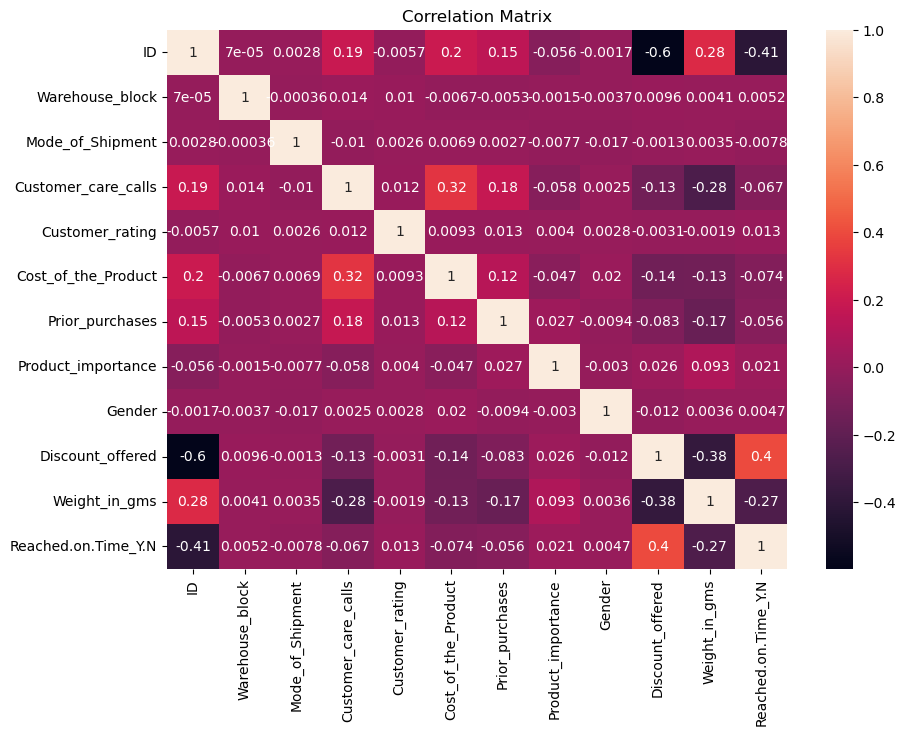

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Mode_of_Shipment'>

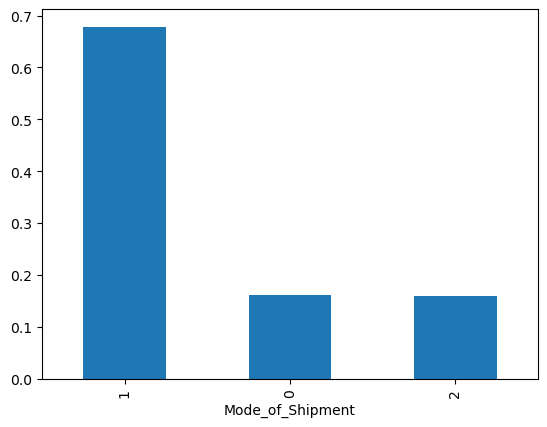

In [38]:
df['Mode_of_Shipment'].value_counts(normalize = True).plot(kind = 'bar')

#In this bar graph 0 indicates Flight,1 indicates Ship and 2 indicates Road 

<Axes: xlabel='Gender'>

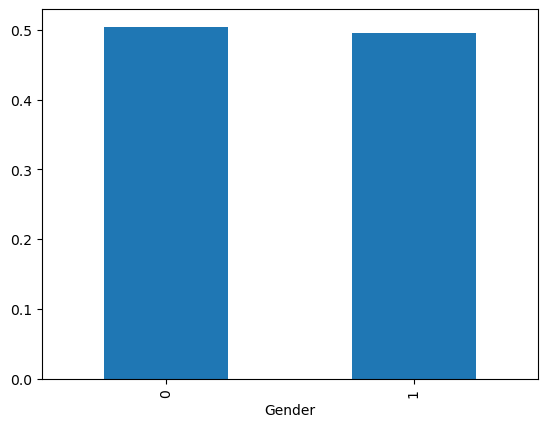

In [39]:
df['Gender'].value_counts(normalize = True).plot(kind='bar')

#In this graph 0 indicates Female and 1 indicates Male

<Axes: ylabel='proportion'>

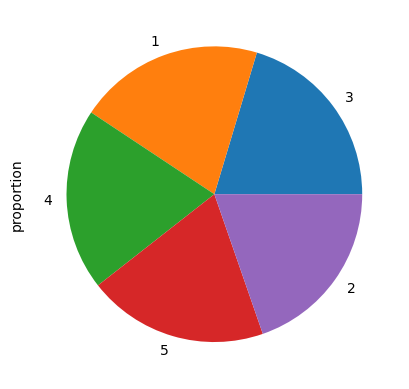

In [40]:
df['Customer_rating'].value_counts(normalize = True).plot(kind = 'pie')

<Axes: xlabel='Cost_of_the_Product'>

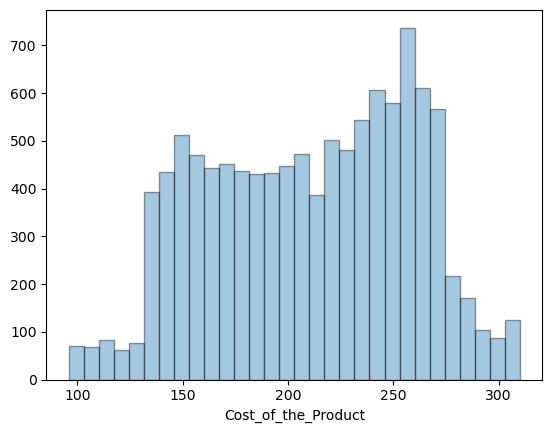

In [41]:
sns.distplot(df['Cost_of_the_Product'],bins=30,hist = True,kde  = False,hist_kws={'edgecolor':'black'})

In [42]:
#Logistic Regression

log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [45]:
predictions = log_model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[2324 1194]
 [1815 3467]]


              precision    recall  f1-score   support

           0       0.56      0.66      0.61      3518
           1       0.74      0.66      0.70      5282

    accuracy                           0.66      8800
   macro avg       0.65      0.66      0.65      8800
weighted avg       0.67      0.66      0.66      8800



<Axes: >

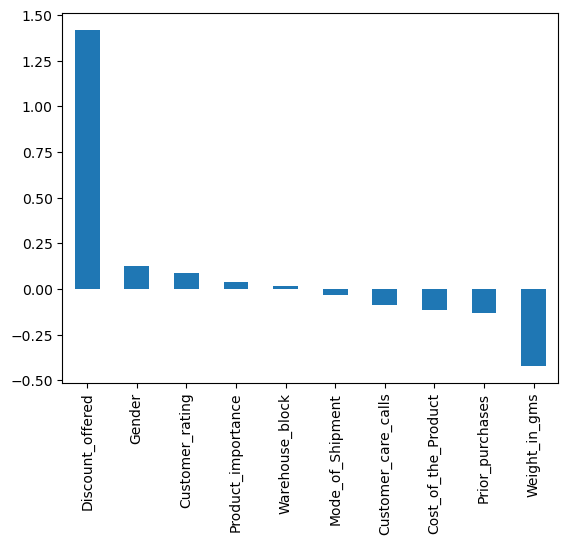

In [47]:
W = pd.Series(log_model.coef_[0],index = x.columns)
W.sort_values(ascending = False)[:10].plot(kind = 'bar')

In [49]:
#Random_forest

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

predictions = rf_model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[2710  808]
 [2080 3202]]


              precision    recall  f1-score   support

           0       0.57      0.77      0.65      3518
           1       0.80      0.61      0.69      5282

    accuracy                           0.67      8800
   macro avg       0.68      0.69      0.67      8800
weighted avg       0.71      0.67      0.67      8800



<Axes: >

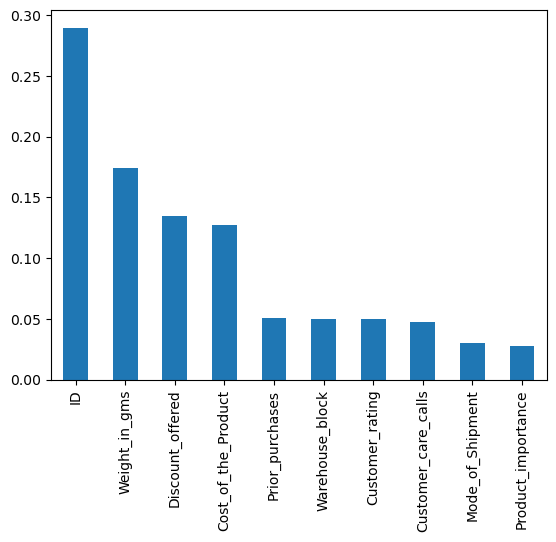

In [50]:
imp = pd.Series(rf_model.feature_importances_,index = x.columns)
imp.sort_values(ascending = False)[:10].plot(kind = 'bar')

In [53]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
#K-Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
def choose_k(x_train, y_train, x_test, y_test, max_k=10):
    k_values = list(range(1, max_k+1))
    accuracy_values = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
    plt.title('Accuracy vs. Number of Neighbors (k)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    best_k = k_values[accuracy_values.index(max(accuracy_values))]
    return best_k


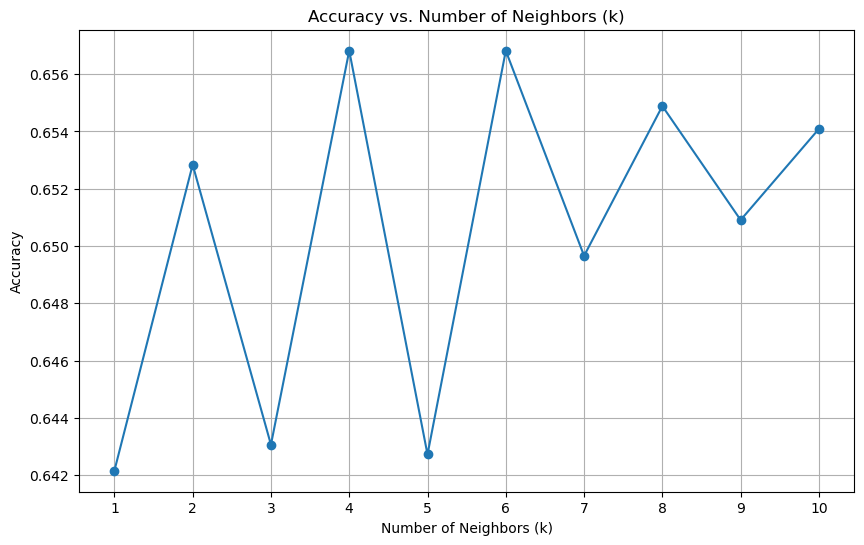

Best k: 4


In [59]:
best_k = choose_k(x_train, y_train, x_test, y_test)
print("Best k:", best_k)

In [63]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [65]:
y_pred = knn.predict(x_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6568181818181819
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.79      0.65      3518
           1       0.80      0.57      0.67      5282

    accuracy                           0.66      8800
   macro avg       0.67      0.68      0.66      8800
weighted avg       0.70      0.66      0.66      8800



In [67]:
#Decision Tree

x = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [73]:
clf = DecisionTreeClassifier()

In [75]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [77]:
y_pred = clf.predict(x_test)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1312
           1       0.72      0.72      0.72      1988

    accuracy                           0.66      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.66      0.66      0.66      3300



In [81]:
#AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

base_estimator = DecisionTreeClassifier(max_depth=1)

ada_boost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

ada_boost.fit(x_train, y_train)


y_train_pred = ada_boost.predict(x_train)

y_test_pred = ada_boost.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.70
Test Accuracy: 0.69


In [82]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [84]:
#XGBoost Classifier

from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

xgb_model.fit(x_train, y_train)

y_test_pred = xgb_model.predict(x_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")

y_train_pred = xgb_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Test Accuracy: 0.69
Training Accuracy: 0.71


In [85]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [86]:
#CatBoost Classifier

from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_seed=42)

catboost_model.fit(x_train, y_train)

y_test_pred = catboost_model.predict(x_test)


test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")

y_train_pred = catboost_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Test Accuracy: 0.69
Training Accuracy: 0.73
